In [1]:
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [66]:
X=torch.linspace(1,70,70).reshape(-1,1)
print(x)


tensor([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11],
        [12],
        [13],
        [14],
        [15],
        [16],
        [17],
        [18],
        [19],
        [20],
        [21],
        [22],
        [23],
        [24],
        [25],
        [26],
        [27],
        [28],
        [29],
        [30],
        [31],
        [32],
        [33],
        [34],
        [35],
        [36],
        [37],
        [38],
        [39],
        [40],
        [41],
        [42],
        [43],
        [44],
        [45],
        [46],
        [47],
        [48],
        [49],
        [50],
        [51],
        [52],
        [53],
        [54],
        [55],
        [56],
        [57],
        [58],
        [59],
        [60],
        [61],
        [62],
        [63],
        [64],
        [65],
        [66],
        [67],
        [68],
        [69],
        [70]])


In [68]:
torch.manual_seed(71)
e=torch.randint(-8,9,(70,1),dtype=torch.float)
print(e)

tensor([[ 2.],
        [ 7.],
        [ 2.],
        [ 6.],
        [ 2.],
        [-4.],
        [ 2.],
        [-5.],
        [ 4.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 1.],
        [-8.],
        [ 5.],
        [ 5.],
        [-6.],
        [ 0.],
        [-7.],
        [-8.],
        [-3.],
        [-1.],
        [ 2.],
        [-6.],
        [-3.],
        [ 3.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 1.],
        [ 7.],
        [ 6.],
        [-1.],
        [-6.],
        [-5.],
        [-3.],
        [ 7.],
        [ 0.],
        [ 8.],
        [-1.],
        [-2.],
        [ 2.],
        [-8.],
        [-1.],
        [ 6.],
        [-8.],
        [-3.],
        [-7.],
        [-2.],
        [ 5.],
        [ 8.],
        [-7.],
        [ 1.],
        [-6.],
        [ 8.],
        [ 8.],
        [ 8.],
        [-6.],
        [-5.],
        [-6.],
        [-6.],
        [-1.],
        [ 1.],
        [ 2.],
        [ 4.],
        [-

In [67]:
y=2*x+1+e
print(y.shape)

torch.Size([70, 1])


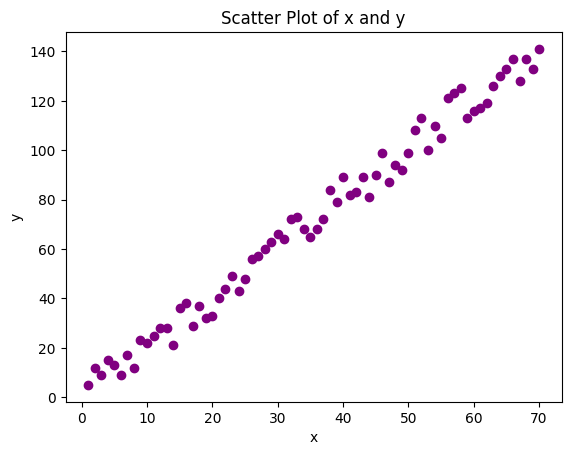

In [69]:
plt.scatter(x.numpy(),y.numpy(),color="purple")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter Plot of x and y")
plt.show()

In [70]:
torch.manual_seed(71)
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [71]:
torch.manual_seed(71)
model = Model(1, 1)
print('Weight:', model.linear.weight.item())
print('Bias:  ', model.linear.bias.item())

Weight: 0.014539122581481934
Bias:   -0.3305763006210327


In [72]:
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

In [73]:
epochs = 50
losses = []

for epoch in range(1, epochs + 1):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = loss_function(y_pred, y)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
    print(f'epoch: {epoch:2}  loss: {loss.item():10.8f}  '
          f'weight: {model.linear.weight.item():10.8f}  '
          f'bias: {model.linear.bias.item():10.8f}')


epoch:  1  loss: 6727.25781250  weight: 0.68335736  bias: -0.31622770
epoch:  2  loss: 2999.05200195  weight: 1.12888908  bias: -0.30663058
epoch:  3  loss: 1344.64416504  weight: 1.42567873  bias: -0.30019864
epoch:  4  loss: 610.49353027  weight: 1.62338400  bias: -0.29587522
epoch:  5  loss: 284.71072388  weight: 1.75508440  bias: -0.29295635
epoch:  6  loss: 140.14305115  weight: 1.84281552  bias: -0.29097316
epoch:  7  loss: 75.99055481  weight: 1.90125668  bias: -0.28961325
epoch:  8  loss: 47.52253723  weight: 1.94018638  bias: -0.28866854
epoch:  9  loss: 34.88964081  weight: 1.96611857  bias: -0.28800040
epoch: 10  loss: 29.28366280  weight: 1.98339248  bias: -0.28751653
epoch: 11  loss: 26.79589462  weight: 1.99489868  bias: -0.28715539
epoch: 12  loss: 25.69186401  weight: 2.00256276  bias: -0.28687602
epoch: 13  loss: 25.20186234  weight: 2.00766730  bias: -0.28665113
epoch: 14  loss: 24.98435402  weight: 2.01106691  bias: -0.28646252
epoch: 15  loss: 24.88775635  weight: 2

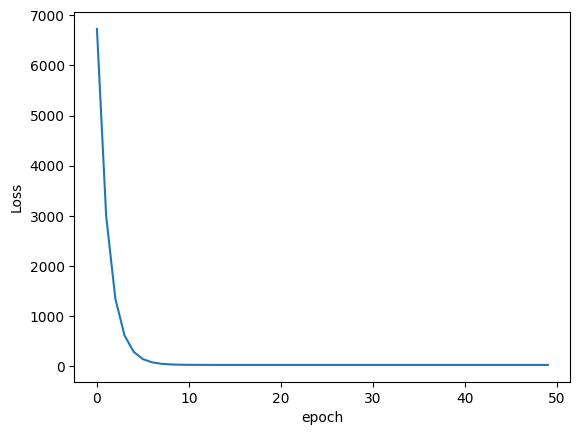

In [74]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');
plt.show()

In [75]:
x1 = torch.tensor([X.min().item(), X.max().item()])
w1, b1 = model.linear.weight.item(), model.linear.bias.item()
y1 = x1 * w1 + b1

In [76]:
print(f'Final Weight: {w1:.8f}, Final Bias: {b1:.8f}')
print(f'X range: {x1.numpy()}')
print(f'Predicted Y values: {y1.numpy()}')

Final Weight: 2.01776600, Final Bias: -0.28213814
X range: [ 1. 70.]
Predicted Y values: [  1.7356279 140.96149  ]


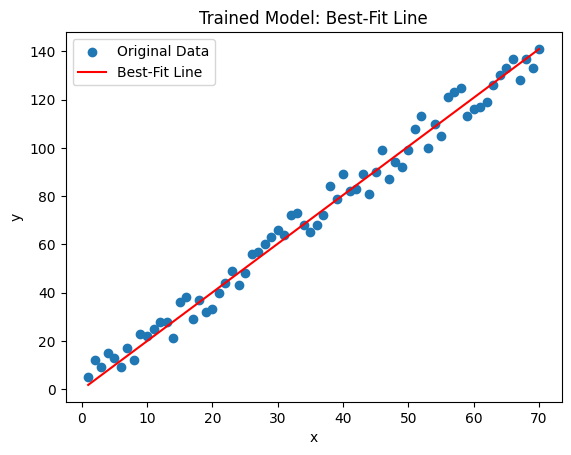

In [77]:
plt.scatter(X.numpy(), y.numpy(), label="Original Data")
plt.plot(x1.numpy(), y1.numpy(), 'r', label="Best-Fit Line")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trained Model: Best-Fit Line')
plt.legend()
plt.show()

In [81]:
torch.save(model.state_dict(),'veslinanish')